## Import required packages

In [1]:
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Load players to get ID values

In [2]:
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)

In [27]:
players

[{'firstName': 'Steven',
  'lastName': 'Adams',
  'playerId': 203500,
  'teamId': 1610612760},
 {'firstName': 'Bam',
  'lastName': 'Adebayo',
  'playerId': 1628389,
  'teamId': 1610612748},
 {'firstName': 'LaMarcus',
  'lastName': 'Aldridge',
  'playerId': 200746,
  'teamId': 1610612759},
 {'firstName': 'Nickeil',
  'lastName': 'Alexander-Walker',
  'playerId': 1629638,
  'teamId': 1610612740},
 {'firstName': 'Grayson',
  'lastName': 'Allen',
  'playerId': 1628960,
  'teamId': 1610612763},
 {'firstName': 'Jarrett',
  'lastName': 'Allen',
  'playerId': 1628386,
  'teamId': 1610612751},
 {'firstName': 'Kadeem',
  'lastName': 'Allen',
  'playerId': 1628443,
  'teamId': 1610612752},
 {'firstName': 'Al-Farouq',
  'lastName': 'Aminu',
  'playerId': 202329,
  'teamId': 1610612753},
 {'firstName': 'Kyle',
  'lastName': 'Anderson',
  'playerId': 203937,
  'teamId': 1610612763},
 {'firstName': 'Ryan',
  'lastName': 'Anderson',
  'playerId': 201583,
  'teamId': 0},
 {'firstName': 'Giannis',
  'la

In [3]:
def get_player_id(first, last):
    for player in players:
        if player['firstName'] == first and player['lastName'] == last:
            return player['playerId']
    return -1

## Load teams to get ID values

In [4]:
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)

In [5]:
def get_team_id(team_name):
    for team in teams:
        if team['teamName'] == team_name:
            return team['teamId']
    return -1

In [6]:
get_team_id('New York Knicks')

1610612752

In [7]:
get_player_id('LeBron', 'James')

2544

## Get shot chart data

In [8]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('Golden State Warriors'),
            player_id = get_player_id('Stephen', 'Curry'),
            context_measure_simple = 'PTS',
            season_nullable = '2015-16',
            season_type_all_star = 'Regular Season')

In [9]:
shot_data = json.loads(shot_json.get_json())

## Transform shot chart data into `pandas` DataFrame

In [10]:
relevant_data = shot_data['resultSets'][0]
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
curry_data = pd.DataFrame(rows)
curry_data.columns = headers

In [11]:
curry_data.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

## Draw court using lines and simple shapes

In [12]:
def create_court(ax, color):
    
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
    return ax

## General plot parameters

In [13]:
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2

## Plot shot chart

/Users/nickfernandez/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


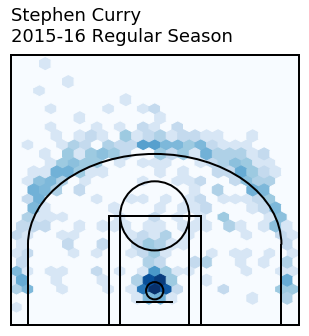

In [14]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])

# Draw court
ax = create_court(ax, 'black')

# Plot hexbin of shots
ax.hexbin(curry_data['LOC_X'], curry_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')

# Annotate player name and season
ax.text(0, 1.05, 'Stephen Curry\n2015-16 Regular Season', transform=ax.transAxes, ha='left', va='baseline')

# Save and show figure
plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()

## Russell Westbrook 2016-17

In [15]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('Oklahoma City Thunder'),
            player_id = get_player_id('Russell', 'Westbrook'),
            context_measure_simple = 'PTS',
            season_nullable = '2016-17',
            season_type_all_star = 'Regular Season')

In [16]:
shot_data = json.loads(shot_json.get_json())

In [17]:
relevant_data = shot_data['resultSets'][0]
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
westbrook_data = pd.DataFrame(rows)
westbrook_data.columns = headers

/Users/nickfernandez/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


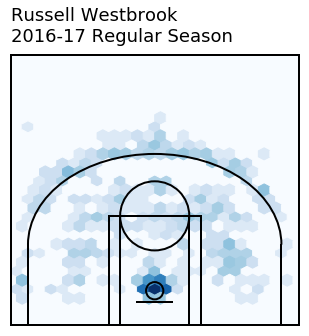

In [18]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])

# Draw court
ax = create_court(ax, 'black')

# Plot hexbin of shots
ax.hexbin(westbrook_data['LOC_X'], westbrook_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')

# Annotate player name and season
ax.text(0, 1.05, 'Russell Westbrook\n2016-17 Regular Season', transform=ax.transAxes, ha='left', va='baseline')

# Save and show figure
plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()

## James Harden 2017-18

In [78]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('Houston Rockets'),
            player_id = get_player_id('James', 'Harden'),
            context_measure_simple = 'PTS',
            season_nullable = '2017-18',
            season_type_all_star = 'Regular Season')

In [79]:
shot_data = json.loads(shot_json.get_json())

In [81]:
relevant_data = shot_data['resultSets'][0]
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
df = pd.DataFrame(rows)
df.columns = headers

/Users/nickfernandez/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


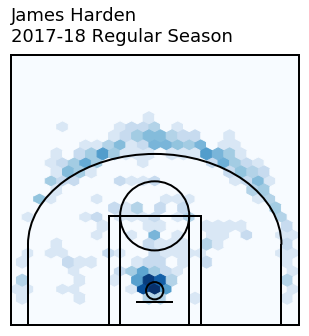

In [82]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])

# Draw court
ax = create_court(ax, 'black')

# Plot hexbin of shots
ax.hexbin(df['LOC_X'], df['LOC_Y'] + 60, gridsize=(30, 30), 
          extent=(-300, 300, 0, 940), 
          bins='log', cmap='Blues')

# Annotate player name and season
ax.text(0, 1.05, 'James Harden\n2017-18 Regular Season', transform=ax.transAxes, ha='left', va='baseline')

# Save and show figure
plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()

## Giannis Antetokounmpo - 2019

# Function

In [173]:
def get_shot_data(first_name, last_name, team, season, gridsize=20):
    
    shot_json = shotchartdetail.ShotChartDetail(
                team_id = get_team_id(team),
                player_id = get_player_id(first_name, last_name),
                context_measure_simple = 'PTS',
                season_nullable = season,
                season_type_all_star = 'Regular Season')

    shot_data = json.loads(shot_json.get_json())

    relevant_data = shot_data['resultSets'][0]
    headers = relevant_data['headers']
    rows = relevant_data['rowSet']

    # Create pandas DataFrame
    df = pd.DataFrame(rows)
    df.columns = headers
    
    image = plt.hexbin(df.LOC_X, df.LOC_Y, cmap=color_map, gridsize=gridsize, mincnt=0, extent=(-300, 300, 0, 940)) 
    counts = image.get_array()
    ncnts = np.count_nonzero(counts)
    verts = image.get_offsets()
    df_grid = pd.DataFrame(verts, columns=['x', 'y'])
    df_grid['counts'] = pd.Series(counts)
    df_grid.head()    
    
    return df, df_grid

(721, 24) (1068, 3)


/Users/nickfernandez/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


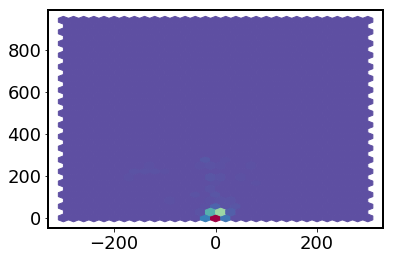

In [175]:
df, df_grid = get_shot_data('Giannis', 'Antetokounmpo', 'Milwaukee Bucks', '2018-19', gridsize=30)
print(df.shape, df_grid.shape)

(630, 24) (472, 3)


/Users/nickfernandez/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


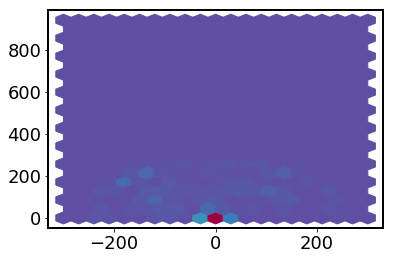

In [176]:
df, df_grid = get_shot_data('Russell', 'Westbrook', 'Oklahoma City Thunder', '2018-19')
print(df.shape, df_grid.shape)

/Users/nickfernandez/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


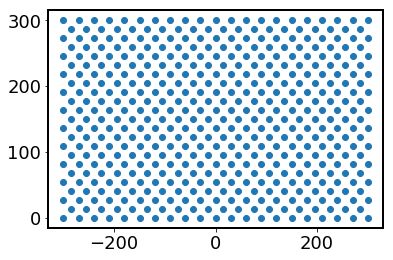

In [154]:
plt.scatter(verts[:,0], verts[:,1])

In [42]:
# def hexagonify(x, y, values, func=None):

#     hexagonized_list = []

#     fig = plt.figure()
#     fig.set_visible(False)
#     if func is not None:
#         image = plt.hexbin(x=x, y=y, C=values, reduce_C_function=func)
#     else:
#         image = plt.hexbin(x=x, y=y, C=values)

#     values = image.get_array()

#     verts = image.get_offsets()
#     for offc in range(verts.shape[0]):
#             binx, biny = verts[offc][0], verts[offc][1]
#             val = values[offc]
#             if val:
#                 hexagonized_list.append((binx, biny, val))

#     fig.clear()
#     plt.close(fig)
#     return hexagonized_list

In [48]:
from __future__ import division
import numpy as np
import math
import matplotlib.pyplot as plt

def generate_data(n):
    """Make random, correlated x & y arrays"""
    points = np.random.multivariate_normal(mean=(0,0),
        cov=[[0.4,9],[9,10]],size=int(n))
    return points




https://stackoverflow.com/questions/12951065/get-bins-coordinates-with-hexbin-in-matplotlib

/Users/nickfernandez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
/Users/nickfernandez/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


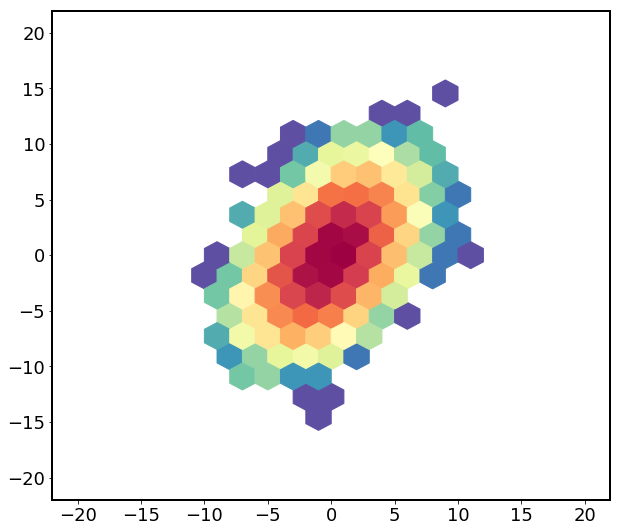

In [61]:
color_map = plt.cm.Spectral_r
n = 1e4
points = generate_data(n)

xbnds = np.array([-20.0,20.0])
ybnds = np.array([-20.0,20.0])
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]

fig=plt.figure(figsize=(10,9))
ax = fig.add_subplot(111)
x, y = points.T
# Set gridsize just to make them visually large
image = plt.hexbin(x,y,cmap=color_map,gridsize=20,extent=extent,mincnt=1, bins='log')

# Note that mincnt=1 adds 1 to each count
counts = image.get_array()
ncnts = np.count_nonzero(np.power(10,counts))
verts = image.get_offsets()
for offc in range(verts.shape[0]):
    binx,biny = verts[offc][0],verts[offc][1]
    if counts[offc]:
        plt.plot(binx,biny,'k.',zorder=100)
ax.set_xlim(xbnds)
ax.set_ylim(ybnds)
plt.grid(True)
cb = plt.colorbar(image,spacing='uniform',extend='max')
# plt.show()

In [52]:
counts.shape

(112,)

In [59]:
verts

array([[-10.00000002,  -5.45454545],
       [-10.00000002,   1.81818182],
       [ -8.00000002, -12.72727273],
       [ -8.00000002,  -9.09090909],
       [ -8.00000002,  -5.45454545],
       [ -8.00000002,  -1.81818182],
       [ -8.00000002,   1.81818182],
       [ -6.00000001, -12.72727273],
       [ -6.00000001,  -9.09090909],
       [ -6.00000001,  -5.45454545],
       [ -6.00000001,  -1.81818182],
       [ -6.00000001,   1.81818182],
       [ -6.00000001,   5.45454545],
       [ -4.00000001, -12.72727273],
       [ -4.00000001,  -9.09090909],
       [ -4.00000001,  -5.45454545],
       [ -4.00000001,  -1.81818182],
       [ -4.00000001,   1.81818182],
       [ -4.00000001,   5.45454545],
       [ -2.        ,  -9.09090909],
       [ -2.        ,  -5.45454545],
       [ -2.        ,  -1.81818182],
       [ -2.        ,   1.81818182],
       [ -2.        ,   5.45454545],
       [ -2.        ,   9.09090909],
       [  0.        ,  -9.09090909],
       [  0.        ,  -5.45454545],
 

In [46]:
# hexagonify('LOC_X', 'LOC_Y', giannis_data)

/Users/nickfernandez/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


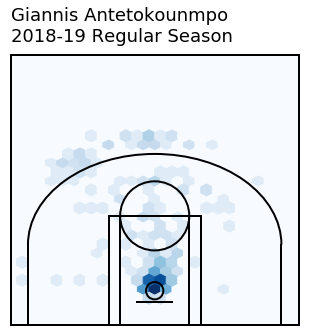

In [26]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])

# Draw court
ax = create_court(ax, 'black')

# Plot hexbin of shots
ax.hexbin(giannis_data['LOC_X'], giannis_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')

# Annotate player name and season
ax.text(0, 1.05, 'Giannis Antetokounmpo\n2018-19 Regular Season', transform=ax.transAxes, ha='left', va='baseline')

# Save and show figure
plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()